1. A University would like to effectively classify their students based on the program they are enrolled in. Perform multinomial regression on the given dataset and provide insights (in the documentation).

    a. prog: is a categorical variable indicating what type of program a student is in: “General” (1), “Academic” (2), or    
    “Vocational” (3).

    b. Ses: is a categorical variable indicating someone’s socioeconomic status: “Low” (1), “Middle” (2), and “High” (3).

    c. read, write, math, and science are their scores on different tests.

    d. honors: Whether they are an honor roll or not.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Multi Nomial Regression/Assignments/mdata.csv')
data.head()

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [3]:
# Dimensions of the dataset
data.shape

(200, 11)

In [4]:
# Checking for null values 
data.isnull().sum()

Unnamed: 0    0
id            0
female        0
ses           0
schtyp        0
prog          0
read          0
write         0
math          0
science       0
honors        0
dtype: int64

    There are no null values

In [5]:
# Checking for duplicated values 
data.duplicated().sum()

0

    There are no duplicated rows

In [6]:
# Removing irrelevant features
data.drop(['Unnamed: 0', 'id'], axis=1, inplace = True)

In [7]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.0,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.0,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.0,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.0,74.0


In [8]:
# Checking datatypes 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   female   200 non-null    object
 1   ses      200 non-null    object
 2   schtyp   200 non-null    object
 3   prog     200 non-null    object
 4   read     200 non-null    int64 
 5   write    200 non-null    int64 
 6   math     200 non-null    int64 
 7   science  200 non-null    int64 
 8   honors   200 non-null    object
dtypes: int64(4), object(5)
memory usage: 14.2+ KB


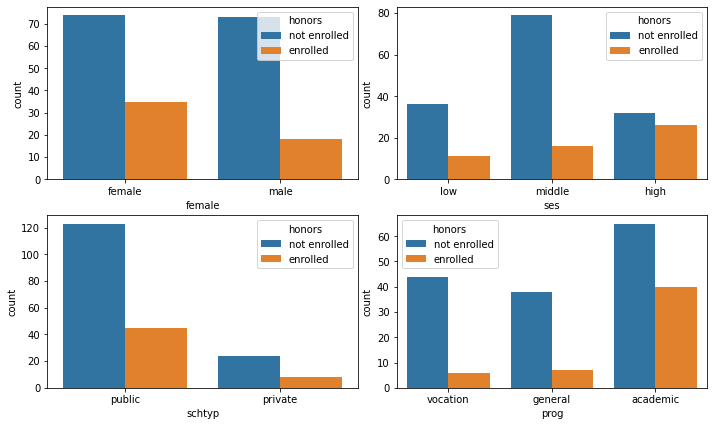

In [9]:
# Countplot for different features

fig, axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()
index = 0
cols_list = data.columns[:4]
for i in cols_list:
    sns.countplot(x = data[i],hue=data.honors, ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad = 1)

Observations:

    There are equal number of males and females , out of which proportion of females enrolled for honors are more
    Middle class students are more in the dataset, most of the high class students have enrolled for honors
    Looking towards type of education, students are mostly from public schools than private
    Maximum number of students are from academic programs and have enrolled the most of all

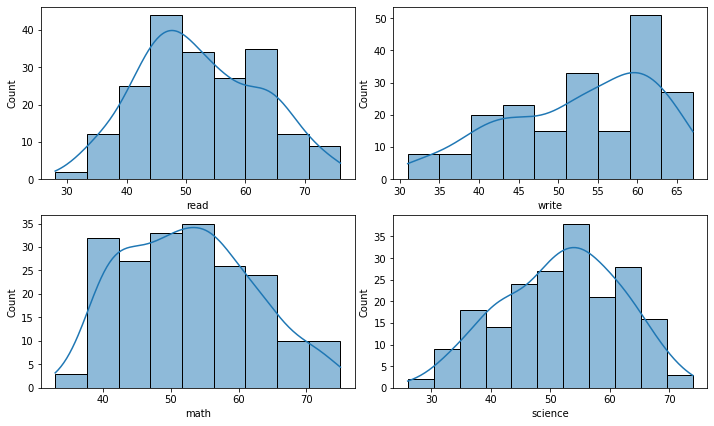

In [10]:
# Ditribution of the numerical features

fig, axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()
index = 0
cols_list = data.columns[4:-1]
for i in cols_list:
    sns.histplot(x = data[i],kde=1, ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad = 1)

    The numerical features are normally distributed

<AxesSubplot:>

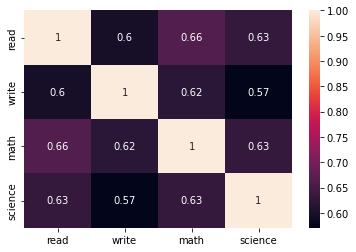

In [11]:
# Correlation between features
sns.heatmap(data.corr(), annot=True)

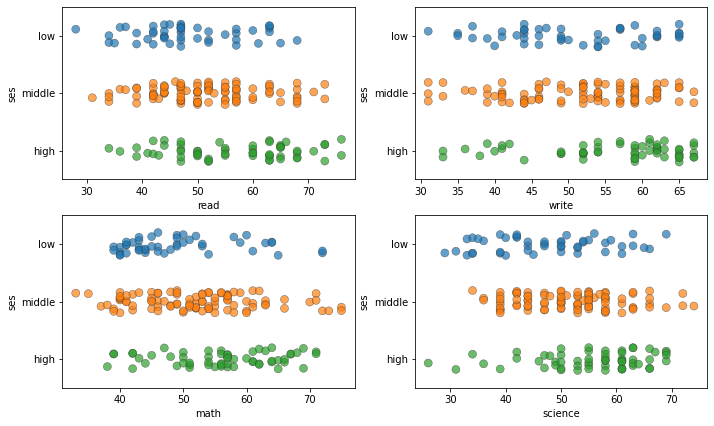

In [12]:
fig, axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()
index = 0
cols_list = ['read','write','math','science']
for i in cols_list:
    sns.stripplot(x = data[i],y = data['ses'], ax = axes[index], jitter=0.2, linewidth= 0.5, size = 8, alpha = 0.7)
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad = 1)


In [13]:
# Converting categorical to numerical

data.ses = data.ses.map({'low':0, 'middle':1, 'high':2})
data = pd.get_dummies(columns=['female','schtyp','prog','honors'], data = data, drop_first = True)

In [14]:
data.head()

,ses,read,write,math,science,female_male,schtyp_public,prog_general,prog_vocation,honors_not enrolled
0,0,34,35,41,29,0,1,0,1,1
1,1,34,33,41,36,1,1,1,0,1
2,2,39,39,44,26,1,1,0,1,1
3,0,37,37,42,33,1,1,0,1,1
4,1,39,31,40,39,1,1,0,1,1


In [15]:
# Splitting into x and y

x = data.drop('honors_not enrolled', axis = 1)
y = data['honors_not enrolled']

In [16]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify= y)

In [17]:
# MultiNomial Logistic Regression

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model = logit.fit(x_train, y_train)   # Fitting the train data

In [18]:
# Predicting for test and train data 

pred_test = model.predict(x_test)
pred_train = model.predict(x_train)

In [19]:
# Accuracy score

from sklearn.metrics import accuracy_score

acc_test = accuracy_score(pred_test, y_test)
print(f'Test data accuracy: {acc_test}')
acc_train = accuracy_score(pred_train, y_train)
print(f'Train data accuracy: {acc_train}')

Test data accuracy: 0.98
Train data accuracy: 1.0
